## A. 데이터 전처리 - 데이터 읽어오기

In [181]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [182]:
# # Numpy 활용해서 csv file 불러오기
# def file_open_by_numpy():
#     np_arr = np.loadtxt('Data/NFLX.csv', delimiter=",", encoding='cp949', dtype=str)
#     return np_arr

# CSV 파일 경로
csv_path = "Data/NFLX.csv"

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols=range(0,5))

# DataFrame 출력
df


,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [183]:
# arr = file_open_by_numpy()
# print(arr)

In [184]:
# type(arr)

In [185]:
# # 데이터 프레임 생성하기
# df = pd.DataFrame(arr)
# df


In [186]:
# 그런데 [‘Date’, ‘Open’, ‘High’, ‘Low’, ‘Close’ ] 필드만 읽어오도록 구성해야 하니까
# 특정 범위의 열만 가져오기(True/False 배열을 이용해서 True인 행만 가져오기)
# df.loc[:,[True,True,True,True,True,False,False]]




## B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

In [187]:
# 날짜 데이터를 필터링이 가능하게 하기 위해서 
# 데이터 타입을 변경하기(to_datetime() 활용해서 하기!)
df["Date"] = pd.to_datetime(df["Date"])

# 2021-01-01 이후의 데이터만 선택해서 df_2021 만들기
df_2021 = df[df["Date"] >= "2021-01-01"]

df_2021



,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


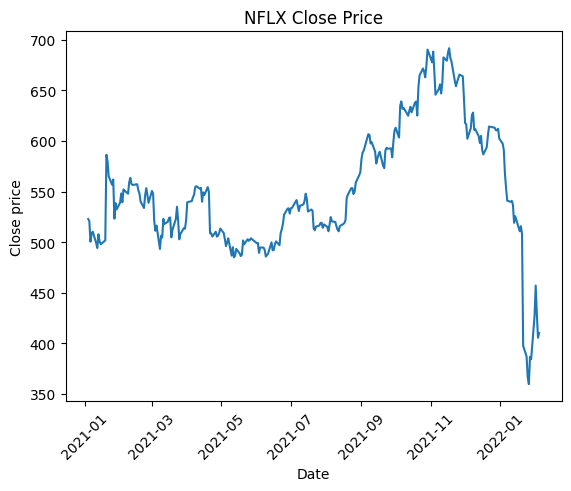

In [188]:
# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_2021['Date'], df_2021['Close'])

# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close price')

# x축 레이블 회전시키기
plt.xticks(rotation=45)

# 그래프 출력하기
plt.show()

## C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [189]:
max_close = df_2021['Close'].max()
min_close = df_2021['Close'].min()


print(f'최고 종가: {max_close}')
print(f'최저 종가: {min_close}')

최고 종가: 691.690002
최저 종가: 359.700012


## D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

In [190]:
# dt.to_period 사용하기
month_group = df_2021.groupby(df_2021['Date'].dt.to_period('M')).mean()


# # 월별 평균 값 구하기
# df_2021['month'] = df_2021['Date'].dt.month
# df_2021

# # # 그래프 그리기
# # plt = df_2021.groupby(by = df_2021['Date'].datetime.strftime('%Y-%m')).mean()[['Close']]


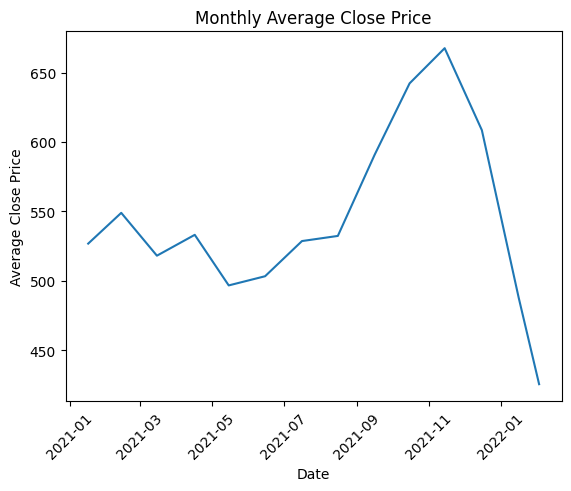

In [191]:
# 그래프 그리기
plt.plot(month_group['Date'],month_group['Close'])

# 그래프 제목 설정
plt.title('Monthly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Average Close Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# # 범례 표시
# plt.legend()

# 그래프 표시
plt.show()

## E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

In [192]:
# 2022-01-01 이후의 데이터만 선택해서 df_2021 만들기
df_2022 = df[df["Date"] >= "2022-01-01"]

df_2022

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


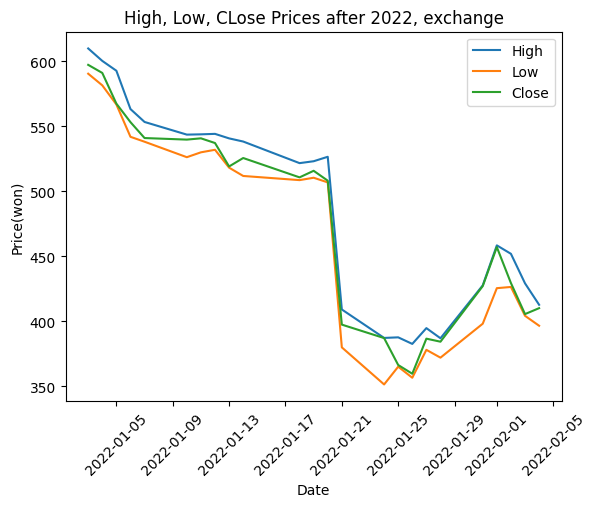

In [193]:
# 그래프 그리기
plt.plot(df_2022['Date'], df_2022['High'], label='High')
plt.plot(df_2022['Date'], df_2022['Low'], label='Low')
plt.plot(df_2022['Date'],df_2022['Close'], label='Close')

# 그래프 제목 설정
plt.title('High, Low, CLose Prices after 2022, exchange')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price(won)')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()